# Task 1


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.special
import math
import scipy.constants as const
# import scipy.constants.physical_constants

In [67]:
def V_total(R, R_e, D_e):
    return D_e * ((R_e / R) ** 12 - 2 * (R_e / R) ** 6)


def reduced_mass(m1, m2):
    return (m1 * m2) / (m1 + m2)

def get_dist_matrix(R_0, R_N, N):
    R_ar = np.array([])

    for i in range(1, N):
        R_i = R_0 + (i * (R_N - R_0)) / N 
        R_ar = np.append(R_ar, R_i)
    return R_ar


def populate_energy_matrix(N, R_N, R_0):
    T = np.zeros([N, N])
    for i in range(1, N - 1):
        for j in range(1, N - 1):
            if i == j:
                T[i, j] = (pi ** 2) * (1 / 3 * (2 * N ** 2 + 1) - (np.sin(pi * i / N)) ** (-2)) / (4 * mu * (R_N - R_0) ** 2)
            else:
                T[i, j] = (pi ** 2) * (- 1) ** (i - j) * ((np.sin(pi * (i - j) /  (2 * N))) ** (- 2) - (np.sin(pi * (i + j) /  (2 * N))) ** (- 2)) / (4 * mu * (R_N - R_0) ** 2)
    return T

# def populate_potential_matrix(N, R, R_e, D_e , mu):
#     V = np.zeros([N, N])
#     di = np.diag_indices(N) # diag indices of our array
#     V_int = V_total(R_ar, R_e, D_e)

#     di_ar = np.asarray(di)
#     R_to_diag = np.zeros([N, N])
#     grid = np.indices((N, N))
#     np.fill_diagonal(R_to_diag, V_int)
#     V = (grid[0] * (grid[0] + 1)) / (2 * mu * R_to_diag ** 2) + R_to_diag

#     t = np.zeros([dimension, dimension], dtype=bool)
#     t[di] = True

#     V[~t] = 0
#     return V
    



In [76]:
# initial parameters

h_dash = 1
m_e = h_dash
pi = np.pi

physical_constants = const.physical_constants
hartree_kelvin_val = physical_constants['hartree-kelvin relationship'][0]

# all those variables in atomic units a.u

u = 1822.888
m_39K = 38.963707 * u
m_40K = 39.963999 * u
m_41K = 40.961825 * u

D_e = 0.0011141
R_e = 10.98

mu = reduced_mass(m_39K, m_40K)

R_0 = 5 # in a.u
R_N = 17
N = 2000
dimension = N

# collocations distances

R_ar = get_dist_matrix(R_0, R_N, N)

# energy matrix

T = populate_energy_matrix(dimension, R_N, R_0)

# potential matrix

V = np.zeros([dimension, dimension])
di = np.diag_indices(N) # diag indices of our array
V_int = V_total(R_ar, R_e, D_e)

for i in range(1, N - 1):
    for j in range(1, N - 1):
        if i == j:
            V[i][j] = j * (j + 1) / (2 * mu * R_ar[j] ** 2) + V_int[j]

# hamiltonian

H = T + V
H_copy = H.copy()
H_copy = np.delete(H, 0, 0)
H_copy = np.delete(H_copy, len(H_copy) - 1, 0)
H_copy = np.delete(H_copy, 0, 1)
H_copy = np.delete(H_copy, len(H_copy) - 1, 1)

w, v = np.linalg.eig(H) # w eigenvalues and v eigenvectors

w_1, v_1 = np.linalg.eig(H_copy) # w eigenvalues and v eigenvectors

test = v[:, 2]
xaxis = R_ar[0:]

yaxis = test[0:len(test)-1]

yaxis_2 = yaxis ** 2

print(yaxis)

# plt.plot(xaxis, yaxis)
# plt.xlim([5, 5.1])
# plt.show()
# test.shape


# hamiltonian musi byc wymiarow N-1 oraz pozostale macierez rowniez

# WSYSTKO MUSZE ZROBIC NIE OD 0 DO N TYLKO OD 1 DO N-1 BO INACZEJ BEDZIE NIEOKRESLONE
# TO POWINNO BYC PROBLEMEM

[ 0.00000000e+00  4.02617726e-01 -2.65704015e-01 ... -1.00995887e-11
  7.55026780e-12 -4.92487130e-12]


## Plot our wave function

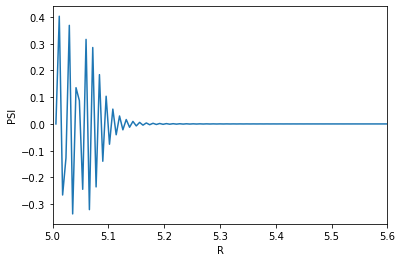

In [79]:

plt.plot(xaxis, yaxis)
plt.ylabel("PSI")
plt.xlabel("R")
plt.xlim([5, 5.6])
plt.show()

## Plot energy distribution

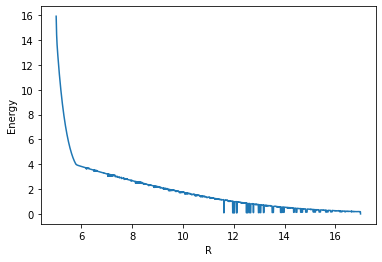

In [80]:
plt.plot(R_ar, w[0:len(w) -1])
plt.ylabel("Energy")
plt.xlabel("R")
plt.show()

In [70]:
# T and V have this structure
# 1 x N - 1 are non zero elements
# 0 0 0 0 0 0
# 0 1 1 1 1 0
# 0 1 1 1 1 0
# 0 1 1 1 1 0
# 0 1 1 1 1 0
# 0 0 0 0 0 0

In [71]:

# v_flipped = np.flip(v, axis=1)
# # for i in v_flipped[14]:
# #     print(i)

# # for i in range(100, 500):
# #     if i % 10 == 0:
# #         plt.plot(R_ar, v_flipped[i])
# #         plt.ylabel("PSI " + str(i))
# #         plt.xlabel("R")
# #         plt.xlim([5, 8])
# #         plt.show()    

# plt.plot(R_ar, v_flipped[:, 1])        # dla stanu podstawowego powinien byc gauss w r = 11
# plt.ylabel("PSI")
# plt.xlabel("R")
# # plt.xlim([6.5, 6.9])
# plt.show()